# 1. Đọc dữ liệu từ file CSV

In [23]:
import pandas as pd 
df = pd.read_csv('data.csv')
df.head(5)

,ID,Tên,Tuổi,Giới tính,Sản phẩm,Chi tiêu
0,1,Nguyễn Văn A,25,Nam,Điện thoại,15000000
1,2,Trần Thị B,30,Nữ,Máy tính bảng,12000000
2,3,Phạm Văn C,22,Nam,Laptop,20000000
3,4,Hoàng Thị D,35,Nữ,Tivi,18000000
4,5,Lê Văn E,28,Nam,Điện thoại,14000000


# 2. Hiển thị thông tin dữ liệu


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         10 non-null     int64 
 1   Tên        10 non-null     object
 2   Tuổi       10 non-null     int64 
 3   Giới tính  10 non-null     object
 4   Sản phẩm   10 non-null     object
 5   Chi tiêu   10 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 612.0+ bytes



# 3. Phân loại thuộc tính

In [26]:
df.dtypes

ID            int64
Tên          object
Tuổi          int64
Giới tính    object
Sản phẩm     object
Chi tiêu      int64
dtype: object

- Biến định lượng: ID, tuổi, chi tiêu
- Biến định tính: Tên, Giới tính, sản phẩm

# 4. Sản phẩm phổ biến nhất

In [29]:
df['Sản phẩm'].value_counts().idxmax()

'Điện thoại'

# 5. Tính tỷ lệ nam và nữ


In [33]:
k = df['Giới tính'].value_counts()
ty_le_nam = k['Nam'] / len(df) * 100
ty_le_nu = k['Nữ'] / len(df) * 100
print("Tỷ lệ nam: ", ty_le_nam)
print("Tỷ lệ nữ: ", ty_le_nu)

Tỷ lệ nam:  50.0
Tỷ lệ nữ:  50.0


# 6. Nhóm tuổi có mức chi tiêu trung bình cao nhất

In [35]:
# nhóm tuổi lại ,   
df.groupby('Tuổi')['Chi tiêu'].mean().idxmax()

np.int64(45)

# 7. Thống kê mức chi tiêu

In [36]:
df['Chi tiêu'].describe()

count    1.000000e+01
mean     1.710000e+07
std      4.771443e+06
min      1.100000e+07
25%      1.325000e+07
50%      1.650000e+07
75%      2.075000e+07
max      2.500000e+07
Name: Chi tiêu, dtype: float64

Nhận xét: 
- Không thấy sự khác biệt rõ ràng giữa các giá trị 

# 8. Trực quan hóa phân bố chi tiêu

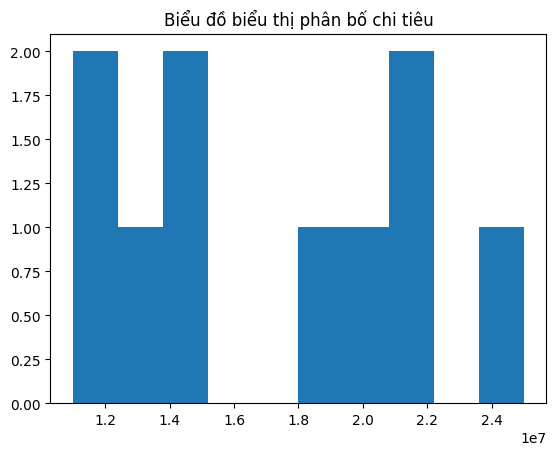

In [38]:
import matplotlib.pyplot as plt 

plt.hist(df['Chi tiêu'])
plt.title("Biểu đồ biểu thị phân bố chi tiêu")
plt.show()

Nhận xét: 
- tiêu 12 triệu, 14 triệu, 22 triệu là cao nhất 
- còn lại thì tương tự nhau

# 9. Biểu đồ hộp so sánh mức chi tiêu theo nhóm tuổi và giới tính

/var/folders/bj/4zbr51sj4fsbvtllcchl3wzc0000gn/T/ipykernel_1907/1168885174.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([gioi_tinh_nam, gioi_tinh_nu], labels=['Nam', 'Nữ'])


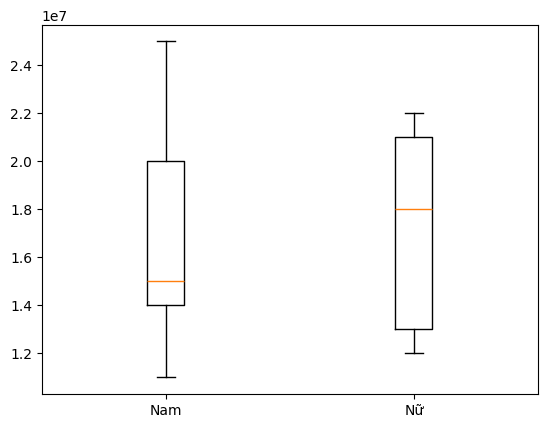

In [46]:
gioi_tinh_nam = df[df['Giới tính'] == 'Nam'].groupby('Tuổi')['Chi tiêu'].sum()

gioi_tinh_nu = df[df['Giới tính'] == 'Nữ'].groupby('Tuổi')['Chi tiêu'].sum()

plt.boxplot([gioi_tinh_nam, gioi_tinh_nu], labels=['Nam', 'Nữ'])
plt.show()

# 10. Biểu đồ tròn thể hiện tỷ lệ tổng chi tiêu của từng nhóm tuổi

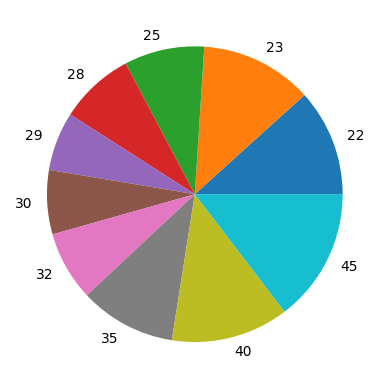

In [48]:
tong_chi_tieu = df.groupby("Tuổi")['Chi tiêu'].sum()
plt.pie(tong_chi_tieu, labels=tong_chi_tieu.index)
plt.show()